In [1]:
import librosa
from matplotlib import pyplot as plt
import pandas as pd
import IPython.display as ipd

In [2]:
audio = "D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav" 

In [3]:
ipd.Audio(audio)

In [4]:
y, sr = librosa.load(audio) 

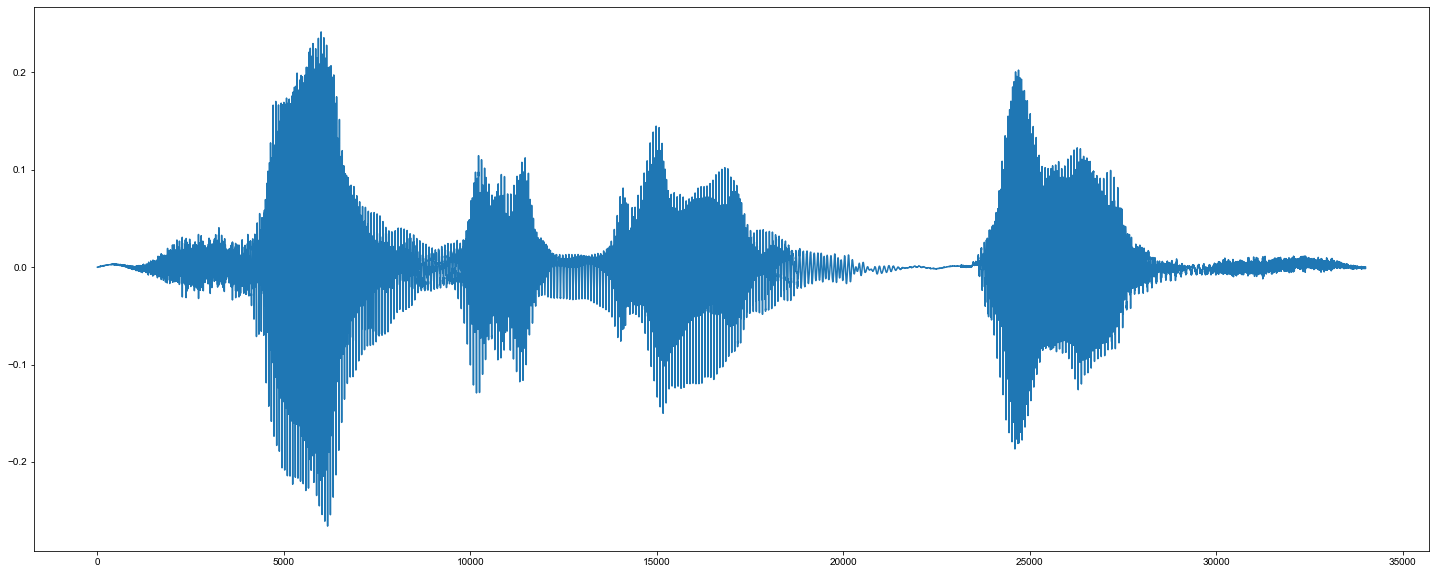

In [5]:
plt.figure(figsize = (25, 10)) 
plt.plot(y)
from itertools import cycle
import librosa.display
import seaborn as sns
sns.set_theme(style = "white" , palette = None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"] 
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"]) 

In [6]:
sr

22050

In [7]:
y

array([-3.8700064e-06,  4.2080985e-05,  4.6381530e-05, ...,
       -1.4604805e-03, -1.2314213e-03,  0.0000000e+00], dtype=float32)

In [8]:
def features_extract(file): 
    audio, sam = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sam, n_mfcc=40)
    mfcc_scaled = np.mean(mfccs_features.T, axis=0)
    
    return mfcc_scaled

In [9]:
import numpy as np 
import os
from tqdm import tqdm 
path = "D:\\\Emotions_Audio\\\TESS Toronto emotional speech set data\\\TESS Toronto emotional speech set data"
extracted_features = []
print(len(extracted_features))
all_files = os.listdir(path) # list containing all folders name
print(path)

0
D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data


In [10]:
features = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Pleasant_Surprise', 'Sad'] 
j=0 
while j!=14:
    sets = all_files[j]
    cur_path = path + "\\\{}".format(sets)
    print(cur_path)
    # print(list(["Angry", os.listdir(cur_path)]))
    for i in tqdm(os.listdir(cur_path)):
        data = features_extract(cur_path + "\\\{}".format(i))
        extracted_features.append([sets, data])
    j+=1


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 61.85it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_disgust


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 48.93it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Fear


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 58.51it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_happy


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 53.68it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_neutral


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 51.59it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Pleasant_surprise


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 53.78it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Sad


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 46.36it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_angry


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 49.46it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_disgust


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 43.82it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_fear


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 52.13it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_happy


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 55.53it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_neutral


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 53.26it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_pleasant_surprised


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 51.49it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_sad


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 50.25it/s]


In [11]:
voice = pd.DataFrame(extracted_features)
voice.columns = ['Mood', 'Data']  

In [12]:
voice 

,Mood,Data
0,OAF_angry,"[-387.35645, 58.00525, -23.070848, -6.4950075,..."
1,OAF_angry,"[-448.57208, 70.98286, -8.170729, -14.899887, ..."
2,OAF_angry,"[-407.019, 33.079754, -11.734395, 6.1423593, -..."
3,OAF_angry,"[-387.9774, 58.727615, -17.779144, -7.8950744,..."
4,OAF_angry,"[-402.43118, 57.398098, -2.0817034, 13.913458,..."
...,...,...
2795,YAF_sad,"[-396.6531, 68.68635, 27.67157, 49.48823, -8.8..."
2796,YAF_sad,"[-409.28275, 83.23681, 19.076742, 46.272194, -..."
2797,YAF_sad,"[-376.129, 73.641525, 30.505957, 48.876934, -1..."
2798,YAF_sad,"[-427.49304, 75.27528, 23.589348, 43.188694, -..."


In [13]:
voice['Mood'].value_counts() 

OAF_angry                 200
OAF_disgust               200
OAF_Fear                  200
OAF_happy                 200
OAF_neutral               200
OAF_Pleasant_surprise     200
OAF_Sad                   200
YAF_angry                 200
YAF_disgust               200
YAF_fear                  200
YAF_happy                 200
YAF_neutral               200
YAF_pleasant_surprised    200
YAF_sad                   200
Name: Mood, dtype: int64

In [14]:
def updown(col_names):
    k = col_names.split('_')[1]
    return k

In [15]:
def lower(col_names):
    l = col_names.lower()
    return l 

In [16]:
voice['Mood'] = voice['Mood'].apply(lower) 
voice['Mood'] = voice['Mood'].apply(updown) 

In [17]:
voice['Mood'].value_counts()

angry       400
disgust     400
fear        400
happy       400
neutral     400
pleasant    400
sad         400
Name: Mood, dtype: int64

In [18]:
voice

,Mood,Data
0,angry,"[-387.35645, 58.00525, -23.070848, -6.4950075,..."
1,angry,"[-448.57208, 70.98286, -8.170729, -14.899887, ..."
2,angry,"[-407.019, 33.079754, -11.734395, 6.1423593, -..."
3,angry,"[-387.9774, 58.727615, -17.779144, -7.8950744,..."
4,angry,"[-402.43118, 57.398098, -2.0817034, 13.913458,..."
...,...,...
2795,sad,"[-396.6531, 68.68635, 27.67157, 49.48823, -8.8..."
2796,sad,"[-409.28275, 83.23681, 19.076742, 46.272194, -..."
2797,sad,"[-376.129, 73.641525, 30.505957, 48.876934, -1..."
2798,sad,"[-427.49304, 75.27528, 23.589348, 43.188694, -..."


In [19]:
X = np.array(voice['Data'].tolist())
y = np.array(voice['Mood'].tolist())

In [20]:
X.shape

(2800, 40)

In [21]:
y.shape

(2800,)

In [22]:
y

array(['angry', 'angry', 'angry', ..., 'sad', 'sad', 'sad'], dtype='<U8')

In [23]:
# y = np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = to_categorical(label.fit_transform(y))

In [24]:
y.shape

(2800, 7)

In [25]:
# voice = voice.sample(frac = 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [27]:
voice 

,Mood,Data
0,angry,"[-387.35645, 58.00525, -23.070848, -6.4950075,..."
1,angry,"[-448.57208, 70.98286, -8.170729, -14.899887, ..."
2,angry,"[-407.019, 33.079754, -11.734395, 6.1423593, -..."
3,angry,"[-387.9774, 58.727615, -17.779144, -7.8950744,..."
4,angry,"[-402.43118, 57.398098, -2.0817034, 13.913458,..."
...,...,...
2795,sad,"[-396.6531, 68.68635, 27.67157, 49.48823, -8.8..."
2796,sad,"[-409.28275, 83.23681, 19.076742, 46.272194, -..."
2797,sad,"[-376.129, 73.641525, 30.505957, 48.876934, -1..."
2798,sad,"[-427.49304, 75.27528, 23.589348, 43.188694, -..."


In [28]:
X_train.shape

(2520, 40)

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
num_labels = y.shape[1]
model = Sequential()    #ANN
##first layer
model.add(Dense(100, input_shape = (40, )))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [33]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [34]:
## Train Model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

epochss = 100
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'Audio_Neuron.hdf5', verbose=1, save_best_only = True)
start = datetime.now()

model.fit(X_train, y_train, batch_size = batch_size, epochs = epochss, validation_data=(X_test, y_test), callbacks = [checkpointer])
dur = datetime.now() - start

Epoch 1/100
75/79 [===========================>..] - ETA: 0s - loss: 29.6984 - accuracy: 0.1504
Epoch 1: val_loss improved from inf to 2.08533, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 1s 6ms/step - loss: 28.8244 - accuracy: 0.1492 - val_loss: 2.0853 - val_accuracy: 0.1464
Epoch 2/100
76/79 [===========================>..] - ETA: 0s - loss: 6.6476 - accuracy: 0.1649
Epoch 2: val_loss improved from 2.08533 to 1.94467, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 0s 6ms/step - loss: 6.5603 - accuracy: 0.1647 - val_loss: 1.9447 - val_accuracy: 0.1964
Epoch 3/100
73/79 [==========================>...] - ETA: 0s - loss: 3.1363 - accuracy: 0.1687
Epoch 3: val_loss improved from 1.94467 to 1.94404, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 0s 5ms/step - loss: 3.1180 - accuracy: 0.1671 - val_loss: 1.9440 - val_accuracy: 0.1964
Epoch 4/100
63/79 [======================>.......] - ETA: 0s - loss: 2.3

79/79 [==============================] - 0s 4ms/step - loss: 0.8135 - accuracy: 0.7056 - val_loss: 0.6160 - val_accuracy: 0.8536
Epoch 29/100
77/79 [============================>.] - ETA: 0s - loss: 0.7469 - accuracy: 0.7175
Epoch 29: val_loss improved from 0.61598 to 0.53474, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 0s 4ms/step - loss: 0.7456 - accuracy: 0.7194 - val_loss: 0.5347 - val_accuracy: 0.9036
Epoch 30/100
71/79 [=========================>....] - ETA: 0s - loss: 0.7027 - accuracy: 0.7311
Epoch 30: val_loss improved from 0.53474 to 0.43209, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.7345 - val_loss: 0.4321 - val_accuracy: 0.9179
Epoch 31/100
70/79 [=========================>....] - ETA: 0s - loss: 0.6529 - accuracy: 0.7656
Epoch 31: val_loss improved from 0.43209 to 0.36998, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 0s 4ms/step - loss: 0.6

79/79 [==============================] - 0s 4ms/step - loss: 0.1797 - accuracy: 0.9405 - val_loss: 0.0336 - val_accuracy: 0.9929
Epoch 57/100
69/79 [=========================>....] - ETA: 0s - loss: 0.1880 - accuracy: 0.9502
Epoch 57: val_loss did not improve from 0.03359
79/79 [==============================] - 0s 4ms/step - loss: 0.1791 - accuracy: 0.9516 - val_loss: 0.0493 - val_accuracy: 0.9821
Epoch 58/100
68/79 [========================>.....] - ETA: 0s - loss: 0.1658 - accuracy: 0.9573
Epoch 58: val_loss improved from 0.03359 to 0.02904, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 0s 5ms/step - loss: 0.1696 - accuracy: 0.9556 - val_loss: 0.0290 - val_accuracy: 0.9964
Epoch 59/100
71/79 [=========================>....] - ETA: 0s - loss: 0.1704 - accuracy: 0.9481
Epoch 59: val_loss did not improve from 0.02904
79/79 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9504 - val_loss: 0.0564 - val_accuracy: 0.9786
Epoch 60/100


79/79 [==============================] - 0s 5ms/step - loss: 0.1066 - accuracy: 0.9687 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 86/100
77/79 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9623
Epoch 86: val_loss did not improve from 0.00935
79/79 [==============================] - 0s 4ms/step - loss: 0.1322 - accuracy: 0.9627 - val_loss: 0.0397 - val_accuracy: 0.9821
Epoch 87/100
79/79 [==============================] - ETA: 0s - loss: 0.1076 - accuracy: 0.9667
Epoch 87: val_loss did not improve from 0.00935
79/79 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9667 - val_loss: 0.0290 - val_accuracy: 0.9821
Epoch 88/100
77/79 [============================>.] - ETA: 0s - loss: 0.0980 - accuracy: 0.9700
Epoch 88: val_loss did not improve from 0.00935
79/79 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9694 - val_loss: 0.0307 - val_accuracy: 0.9929
Epoch 89/100
71/79 [=========================>....] 

In [35]:
test_acc = model.evaluate(X_test, y_test, verbose = 0)
print(test_acc[1]) 

0.9892857074737549


In [40]:
data = "C:\\Users\\ATIF SHAIK\\Documents\\Sound Recordings\\free_you.wav" 
ipd.Audio(data) 

In [41]:
# predictu = features_extract(data)
# predictu = predictu.reshape(1, -1)
# op = model.predict(predictu) 
# for i in op:
#     print(np.round(i)) 
audio, sam = librosa.load(data, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sam, n_mfcc=40)
mfcc_scaled = np.mean(mfccs_features.T, axis=0)
# print(mfcc_scaled)
mfcc_scaled = mfcc_scaled.reshape(1, -1)
predicted = model.predict(mfcc_scaled)
for i in predicted:
    print(np.round(i))
d = dict(zip(label.classes_, label.transform(label.classes_)))
print (d) 

[0. 0. 0. 0. 0. 1. 0.]
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'pleasant': 5, 'sad': 6}


In [ ]:
for i in y_test[271]:
    print(i)

In [ ]:
f = X_test[271].reshape(1, -1)
for i in model.predict(f):
    print(np.round(i))

In [ ]:
r, rl = librosa.load(data)